# FA & Clustering

## FA

요인수를 선택해야 한다...
* 속성값들
* 클러스터링 되는 애들

In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 가져오기
internalMetrics_df = pd.read_csv('./data/internal_metrcis0.csv')

In [3]:
# 확인
internalMetrics_df.head()

,redis_version,redis_git_sha1,redis_git_dirty,redis_build_id,redis_mode,os,arch_bits,multiplexing_api,atomicvar_api,gcc_version,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,6.2.1,0,0,c91470f75d7c181b,standalone,Linux 3.10.0-957.27.2.el7.x86_64 x86_64,64,epoll,atomic-builtin,4.8.5,...,0,0,8.506465,3.861151,0.0,0.0,0,249666,0,0
1,6.2.1,0,0,c91470f75d7c181b,standalone,Linux 3.10.0-957.27.2.el7.x86_64 x86_64,64,epoll,atomic-builtin,4.8.5,...,0,0,8.464944,3.926858,0.0,0.0,0,249666,0,0
2,6.2.1,0,0,c91470f75d7c181b,standalone,Linux 3.10.0-957.27.2.el7.x86_64 x86_64,64,epoll,atomic-builtin,4.8.5,...,0,0,8.397651,3.828146,0.0,0.0,0,249666,0,0
3,6.2.1,0,0,c91470f75d7c181b,standalone,Linux 3.10.0-957.27.2.el7.x86_64 x86_64,64,epoll,atomic-builtin,4.8.5,...,0,0,8.392912,3.816183,0.0,0.0,0,249666,0,0
4,6.2.1,0,0,c91470f75d7c181b,standalone,Linux 3.10.0-957.27.2.el7.x86_64 x86_64,64,epoll,atomic-builtin,4.8.5,...,0,0,9.027816,4.059768,0.0,0.0,0,249666,0,0


## 변수 선택
### 버전 환경 관련
* redis_version
* redis_builid_id
* os
* gcc_version
* Executable
* config_file
* tcp_port
* run_id
* process_id

In [4]:
# 버전, 환경 관련 변수
var1_noRel = [
    'redis_version', 
    'redis_build_id', 
    'os',
    'gcc_version',
    'executable',
    'config_file',
    'tcp_port',
    'run_id',
    'process_id',
    'master_replid'
]

In [5]:
# 버전, 환경 관련 변수 확인
var1_noRel

['redis_version',
 'redis_build_id',
 'os',
 'gcc_version',
 'executable',
 'config_file',
 'tcp_port',
 'run_id',
 'process_id',
 'master_replid']

In [6]:
# 변수 제거 
internalMetrics_df = internalMetrics_df.drop(columns = var1_noRel, axis=0)

In [7]:
len(internalMetrics_df.columns)

114

In [8]:
# 변수 제거 데이터프레임 확인
internalMetrics_df.head()

,redis_git_sha1,redis_git_dirty,redis_mode,arch_bits,multiplexing_api,atomicvar_api,uptime_in_seconds,uptime_in_days,hz,configured_hz,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,0,0,standalone,64,epoll,atomic-builtin,22,0,7,7,...,0,0,8.506465,3.861151,0.0,0.0,0,249666,0,0
1,0,0,standalone,64,epoll,atomic-builtin,21,0,32,32,...,0,0,8.464944,3.926858,0.0,0.0,0,249666,0,0
2,0,0,standalone,64,epoll,atomic-builtin,21,0,40,40,...,0,0,8.397651,3.828146,0.0,0.0,0,249666,0,0
3,0,0,standalone,64,epoll,atomic-builtin,21,0,37,37,...,0,0,8.392912,3.816183,0.0,0.0,0,249666,0,0
4,0,0,standalone,64,epoll,atomic-builtin,22,0,30,30,...,0,0,9.027816,4.059768,0.0,0.0,0,249666,0,0


### 모두 동일한 값
fa의 경우 모두 동일한 값이 존재하면 실행 시 오류 발생

In [9]:
len(internalMetrics_df.columns)

114

In [10]:
def find_var_count(df, count):
    var = []
    
    for metric in df:
        if len(df[metric].unique()) == count:
            var.append(metric)
    return var

In [11]:
# 모두 동일한 값 가지고 있는 변수 리스트
# sameValue_var = []

# for metric in internalMetrics_df:
#     if len(internalMetrics_df[metric].unique()) == 1:
#         sameValue_var.append(metric)

# len(sameValue_var)

sameValue = find_var_count(internalMetrics_df, 1)

# 동일 값 변수 제거
internalMetrics_df = internalMetrics_df.drop(columns = sameValue, axis = 0)

In [12]:
# 값이 2개인 경우
twoVal_var = find_var_count(internalMetrics_df, 2)

internalMetrics_df = internalMetrics_df.drop(columns = twoVal_var, axis = 0)

In [13]:
len(internalMetrics_df.columns)

29

In [14]:
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,allocator_allocated,allocator_active,allocator_resident,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,22,7,7,1745211,42033152,40.09,38704616,38658184,38932480,42209280,...,3410544,1629135141,45654,5048972,3187.77,226.38,742,499258,8.506465,3.861151
1,21,32,32,1745245,42037248,40.09,38704616,38658328,38932480,44310528,...,3414640,1629135176,55643,5048972,3885.23,275.94,742,499258,8.464944,3.926858
2,21,40,40,1745272,42029056,40.08,38704616,38657784,38932480,42209280,...,3406448,1629135203,50950,5048972,3557.60,252.57,742,499258,8.397651,3.828146
3,21,37,37,1745300,41828352,39.89,38704616,38658184,38932480,42209280,...,3205744,1629135231,52136,5048972,3640.36,258.74,742,499258,8.392912,3.816183
4,22,30,30,1745328,42037248,40.09,38704616,38657928,38932480,42209280,...,3414640,1629135258,53721,5049038,3751.05,266.38,743,499257,9.027816,4.059768


In [15]:
internalMetrics_df.dtypes

uptime_in_seconds              int64
hz                             int64
configured_hz                  int64
lru_clock                      int64
used_memory_rss                int64
used_memory_rss_human        float64
used_memory_peak               int64
allocator_allocated            int64
allocator_active               int64
allocator_resident             int64
maxmemory                      int64
maxmemory_human              float64
maxmemory_policy              object
allocator_frag_bytes           int64
allocator_rss_ratio          float64
allocator_rss_bytes            int64
rss_overhead_ratio           float64
rss_overhead_bytes             int64
mem_fragmentation_ratio      float64
mem_fragmentation_bytes        int64
rdb_last_save_time             int64
instantaneous_ops_per_sec      int64
total_net_output_bytes         int64
instantaneous_input_kbps     float64
instantaneous_output_kbps    float64
keyspace_hits                  int64
keyspace_misses                int64
u

### 범주형 변수 처리

In [16]:
# maxmemory_policy만 제거해보고 해보기
internalMetrics_df = internalMetrics_df.drop(columns = 'maxmemory_policy', axis = 0)

In [17]:
import pandas as pd

In [18]:
internalMetrics_df = pd.get_dummies(internalMetrics_df)
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,allocator_allocated,allocator_active,allocator_resident,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,22,7,7,1745211,42033152,40.09,38704616,38658184,38932480,42209280,...,3410544,1629135141,45654,5048972,3187.77,226.38,742,499258,8.506465,3.861151
1,21,32,32,1745245,42037248,40.09,38704616,38658328,38932480,44310528,...,3414640,1629135176,55643,5048972,3885.23,275.94,742,499258,8.464944,3.926858
2,21,40,40,1745272,42029056,40.08,38704616,38657784,38932480,42209280,...,3406448,1629135203,50950,5048972,3557.60,252.57,742,499258,8.397651,3.828146
3,21,37,37,1745300,41828352,39.89,38704616,38658184,38932480,42209280,...,3205744,1629135231,52136,5048972,3640.36,258.74,742,499258,8.392912,3.816183
4,22,30,30,1745328,42037248,40.09,38704616,38657928,38932480,42209280,...,3414640,1629135258,53721,5049038,3751.05,266.38,743,499257,9.027816,4.059768


## Scaling

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### standardscaler

In [20]:
std_scaler = StandardScaler()
df = internalMetrics_df.copy()
std_scaler.fit(internalMetrics_df)
internalMetrics_df = std_scaler.transform(internalMetrics_df)


In [21]:
# 표준펴차 확인
internalMetrics_df.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
internalMetrics_df = pd.DataFrame(internalMetrics_df, columns = df.columns, index = list(df.index.values))


In [23]:
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,allocator_allocated,allocator_active,allocator_resident,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,-0.029831,-1.136804,-1.136804,-1.751409,-0.097558,-0.087919,-0.164567,-0.204710,-0.099331,-0.463214,...,-0.102717,-1.751212,0.370439,-0.714460,0.370424,0.368888,-0.714460,0.714460,-1.087608,-1.249273
1,-0.045070,1.002813,1.002813,-1.749900,-0.087680,-0.087919,-0.164567,-0.200422,-0.099331,2.137230,...,-0.092882,-1.749660,1.041542,-0.714460,1.041507,1.041535,-0.714460,0.714460,-1.170053,-0.977473
2,-0.045070,1.687491,1.687491,-1.748702,-0.107436,-0.113206,-0.164567,-0.216622,-0.099331,-0.463214,...,-0.112553,-1.748462,0.726247,-0.714460,0.726267,0.724349,-0.714460,0.714460,-1.303671,-1.385800
3,-0.045070,1.430736,1.430736,-1.747460,-0.591473,-0.593666,-0.164567,-0.204710,-0.099331,-0.463214,...,-0.594513,-1.747220,0.805927,-0.714460,0.805897,0.808090,-0.714460,0.714460,-1.313081,-1.435286
4,-0.029831,0.831644,0.831644,-1.746218,-0.087680,-0.087919,-0.164567,-0.212334,-0.099331,-0.463214,...,-0.092882,-1.746022,0.912414,1.175646,0.912401,0.911783,1.175646,-1.175646,-0.052404,-0.427683


### minmaxscaler

In [24]:
# 객체생성
scaler = MinMaxScaler()

# fit -> transform
scaler.fit(internalMetrics_df) # df는 2차원 이상의 값이어야 함
internalMetrics_df_MinMax = scaler.transform(internalMetrics_df.copy())

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
internalMetrics_df_MinMax = pd.DataFrame(data = internalMetrics_df_MinMax, columns=internalMetrics_df.columns)

In [25]:
internalMetrics_df_MinMax.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,allocator_allocated,allocator_active,allocator_resident,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,0.000305,0.153846,0.153846,0.000000,0.148986,0.149852,0.25,0.912393,0.905983,0.314248,...,0.049678,0.000000,0.668551,0.0,0.668545,0.668833,0.0,1.0,0.127907,0.040699
1,0.000000,0.794872,0.794872,0.000433,0.149565,0.149852,0.25,0.912546,0.905983,0.997337,...,0.050321,0.000445,0.814828,0.0,0.814818,0.815257,0.0,1.0,0.117143,0.053941
2,0.000000,1.000000,1.000000,0.000776,0.148406,0.148368,0.25,0.911967,0.905983,0.314248,...,0.049036,0.000789,0.746105,0.0,0.746107,0.746211,0.0,1.0,0.099697,0.034047
3,0.000000,0.923077,0.923077,0.001132,0.120000,0.120178,0.25,0.912393,0.905983,0.314248,...,0.017535,0.001145,0.763472,0.0,0.763463,0.764440,0.0,1.0,0.098469,0.031636
4,0.000305,0.743590,0.743590,0.001489,0.149565,0.149852,0.25,0.912120,0.905983,0.314248,...,0.050321,0.001489,0.786683,0.5,0.786677,0.787012,0.5,0.5,0.263064,0.080727


In [26]:
internalMetrics_df.dtypes

uptime_in_seconds            float64
hz                           float64
configured_hz                float64
lru_clock                    float64
used_memory_rss              float64
used_memory_rss_human        float64
used_memory_peak             float64
allocator_allocated          float64
allocator_active             float64
allocator_resident           float64
maxmemory                    float64
maxmemory_human              float64
allocator_frag_bytes         float64
allocator_rss_ratio          float64
allocator_rss_bytes          float64
rss_overhead_ratio           float64
rss_overhead_bytes           float64
mem_fragmentation_ratio      float64
mem_fragmentation_bytes      float64
rdb_last_save_time           float64
instantaneous_ops_per_sec    float64
total_net_output_bytes       float64
instantaneous_input_kbps     float64
instantaneous_output_kbps    float64
keyspace_hits                float64
keyspace_misses              float64
used_cpu_sys                 float64
u

## Factor Analysis

In [27]:
import itertools

def func1(df, count):
    sin_rel_var = []

    for var in itertools.combinations(df.columns, count):
        new_df = internalMetrics_df[list(var)]
        try:
            fa_func = FactorAnalyzer(n_factors=2, rotation='varimax')
            fa_func.fit(new_df)        
        except :
            print(list(var))
            sin_rel_var += list(var)
            continue
    sin_rel_var = list(set(sin_rel_var))
    return sin_rel_var

        
sin_rel_var = func1(internalMetrics_df, 2)

['hz', 'configured_hz']
['total_net_output_bytes', 'keyspace_hits']
['total_net_output_bytes', 'keyspace_misses']
['keyspace_hits', 'keyspace_misses']


In [28]:
def unique_value(df, col):
    print(df[col].unique())

unique_value(internalMetrics_df, 'total_net_output_bytes')
unique_value(internalMetrics_df, 'keyspace_hits')
unique_value(internalMetrics_df, 'keyspace_misses')

[-0.71446003  1.17564587  3.06575177]
[-0.71446003  1.17564587  3.06575177]
[ 0.71446003 -1.17564587 -3.06575177]


In [29]:
unique_value(internalMetrics_df, 'hz')
unique_value(internalMetrics_df, 'configured_hz')

[-1.13680436  1.00281296  1.6874905   1.43073643  0.83164358 -0.28095743
 -1.22238905 -1.39355843 -0.70888089 -1.05121966 -1.65031251  0.40372011
 -0.10978804 -0.36654212  0.66047419 -1.30797374  1.25956704  0.31813542
  1.08839765 -0.96563497 -0.02420335  0.48930481  0.91722827 -1.47914313
 -0.88005028  1.17398235  0.74605888 -0.19537274 -0.45212681 -0.79446559
 -0.53771151 -0.6232962   1.34515173 -1.56472782  1.60190581  0.06138134
  0.23255073  0.14696603  0.5748895   1.51632112]
[-1.13680436  1.00281296  1.6874905   1.43073643  0.83164358 -0.28095743
 -1.22238905 -1.39355843 -0.70888089 -1.05121966 -1.65031251  0.40372011
 -0.10978804 -0.36654212  0.66047419 -1.30797374  1.25956704  0.31813542
  1.08839765 -0.96563497 -0.02420335  0.48930481  0.91722827 -1.47914313
 -0.88005028  1.17398235  0.74605888 -0.19537274 -0.45212681 -0.79446559
 -0.53771151 -0.6232962   1.34515173 -1.56472782  1.60190581  0.06138134
  0.23255073  0.14696603  0.5748895   1.51632112]


In [30]:
drop_val = ['configured_hz', 'keyspace_hits', 'keyspace_misses']
internalMetrics_df_drop = internalMetrics_df.drop(columns = drop_val, axis = 0)

func1(internalMetrics_df_drop, 2)

[]

In [31]:
len(internalMetrics_df_drop.columns)

25

### 요인수 선택
* 요인 적재값
* 공통성
* 
* 클러스터링 개수 -> 각 클러스터마다 동등한 개수였으면 좋겠다

In [38]:
def factor_analysis(n_factors, df):
    fa = FactorAnalyzer(n_factors = n_factors, rotation='varimax')  # 객체 생성
    fa.fit(df)  # fitting
    df_fa = pd.DataFrame(fa.loadings_, index = df.columns)
    ev, v = fa.get_eigenvalues()
    return df_fa, ev

In [39]:
internalMetrics_fa, ev = factor_analysis(6, internalMetrics_df_drop)

In [41]:
print(pd.DataFrame(ev))

               0
0   5.342877e+00
1   3.915063e+00
2   3.561978e+00
3   2.303721e+00
4   1.841711e+00
5   1.573166e+00
6   1.384424e+00
7   1.034724e+00
8   9.880227e-01
9   8.952814e-01
10  7.717098e-01
11  6.619459e-01
12  6.117499e-01
13  9.648784e-02
14  1.153223e-02
15  4.027799e-03
16  1.061038e-03
17  4.809875e-04
18  2.709217e-05
19  8.353184e-06
20  5.220340e-10
21  3.062509e-11
22 -2.653637e-16
23 -1.062759e-15
24 -1.968557e-15


### 요인 적재값 
변수와 요인간의 관련성의 정도

해당 변수들이 갖는 value라고 두고 클러스터링을 진행해도 되는걸까?

In [42]:
# 요인 적제값 확인
internalMetrics_fa.head()

,0,1,2,3,4,5
uptime_in_seconds,-0.016200,-0.011505,-0.041452,0.002208,-0.063173,0.288014
hz,0.023534,-0.021148,-0.208276,-0.153961,0.029649,0.015417
lru_clock,-0.021968,0.049792,-0.026060,-0.046243,0.988894,0.112679
used_memory_rss,-0.059832,0.995522,0.005463,0.025984,0.025918,0.046512
used_memory_rss_human,-0.059429,0.995538,0.005756,0.026136,0.026031,0.046219


<AxesSubplot:>

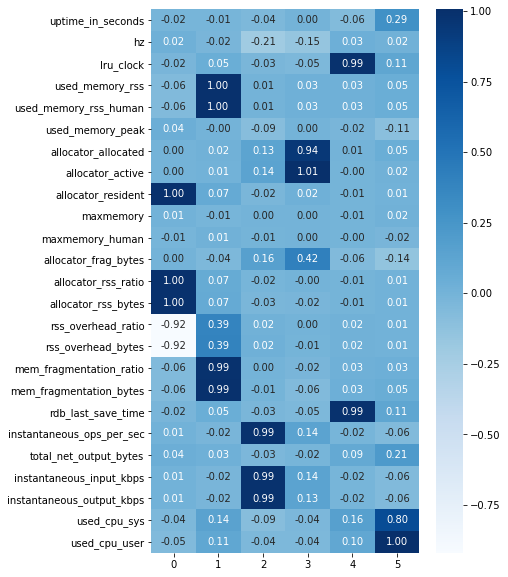

In [35]:
plt.figure(figsize=(6,10))
sns.heatmap(internalMetrics_fa, cmap="Blues", annot=True, fmt='.2f')

### 고유값

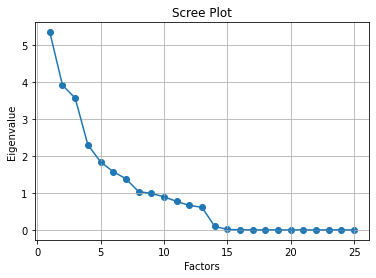

In [43]:
plt.scatter(range(1,internalMetrics_df_drop.shape[1]+1),ev)
plt.plot(range(1,internalMetrics_df_drop.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

---

## Clustering

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(internalMetrics_fa)

KMeans(n_clusters=4)

In [55]:
def kmeans(n_clusters, df):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(df
    
    df['cluster'] = kmeans.labels_
    
    return df

In [56]:
kmeans_df = kmeans(4, internalMetrics_fa)

6.239357014354777


In [47]:
df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,allocator_allocated,allocator_active,allocator_resident,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,22,7,7,1745211,42033152,40.09,38704616,38658184,38932480,42209280,...,3410544,1629135141,45654,5048972,3187.77,226.38,742,499258,8.506465,3.861151
1,21,32,32,1745245,42037248,40.09,38704616,38658328,38932480,44310528,...,3414640,1629135176,55643,5048972,3885.23,275.94,742,499258,8.464944,3.926858
2,21,40,40,1745272,42029056,40.08,38704616,38657784,38932480,42209280,...,3406448,1629135203,50950,5048972,3557.60,252.57,742,499258,8.397651,3.828146
3,21,37,37,1745300,41828352,39.89,38704616,38658184,38932480,42209280,...,3205744,1629135231,52136,5048972,3640.36,258.74,742,499258,8.392912,3.816183
4,22,30,30,1745328,42037248,40.09,38704616,38657928,38932480,42209280,...,3414640,1629135258,53721,5049038,3751.05,266.38,743,499257,9.027816,4.059768


In [48]:
# 클러스터 개수 확인 함수
def clusters(df):
    
    # 총 개수 확인
    print(df['cluster'].value_counts())
    print()
    
    count_cluster = len(df['cluster'].unique())
    new_df = pd.DataFrame()
    metric_list = []
    
    for i in range(count_cluster):
        metric_list = list(df[df['cluster'] == i].index)
        print("len = {}".format(len(df[df['cluster'] == i])))
        print("cluster{}".format(i))
        for metric in metric_list:
            print(metric)
        print()
        
    return new_df

In [49]:
df = clusters(kmeans_df)

1    10
2     6
0     6
3     3
Name: cluster, dtype: int64

len = 6
cluster0
allocator_allocated
allocator_active
allocator_frag_bytes
instantaneous_ops_per_sec
instantaneous_input_kbps
instantaneous_output_kbps

len = 10
cluster1
uptime_in_seconds
hz
lru_clock
used_memory_peak
maxmemory
maxmemory_human
rdb_last_save_time
total_net_output_bytes
used_cpu_sys
used_cpu_user

len = 6
cluster2
used_memory_rss
used_memory_rss_human
rss_overhead_ratio
rss_overhead_bytes
mem_fragmentation_ratio
mem_fragmentation_bytes

len = 3
cluster3
allocator_resident
allocator_rss_ratio
allocator_rss_bytes



### Elbow

In [50]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

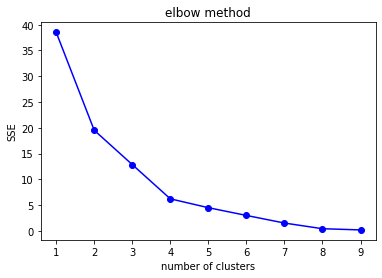

In [51]:
elbow(internalMetrics_fa, 10)

In [54]:
internalMetrics_fa.inertia_

AttributeError: 'DataFrame' object has no attribute 'inertia_'

In [52]:
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

In [53]:
visualize_silhouette_layer(internalMetrics_fa)

NameError: name 'silhouette_score' is not defined